## Find shock on bubble edge, central region, and bubble

yt : [INFO     ] 2019-09-17 12:15:44,642 Parameters: current_time              = 0.0646001530014
yt : [INFO     ] 2019-09-17 12:15:44,643 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-09-17 12:15:44,645 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-09-17 12:15:44,647 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-09-17 12:15:44,651 Parameters: cosmological_simulation   = 0.0
Parsing Hierarchy :  32%|███▏      | 287/886 [00:00<00:00, 1498.66it/s]

stest_0046


Parsing Hierarchy : 100%|██████████| 886/886 [00:00<00:00, 2549.35it/s]
yt : [INFO     ] 2019-09-17 12:15:45,085 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2019-09-17 12:15:50,612 xlim = 0.496250 0.503750
yt : [INFO     ] 2019-09-17 12:15:50,613 ylim = 0.496250 0.503750
yt : [INFO     ] 2019-09-17 12:15:50,616 xlim = 0.496250 0.503750
yt : [INFO     ] 2019-09-17 12:15:50,617 ylim = 0.496250 0.503750
yt : [INFO     ] 2019-09-17 12:15:50,621 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



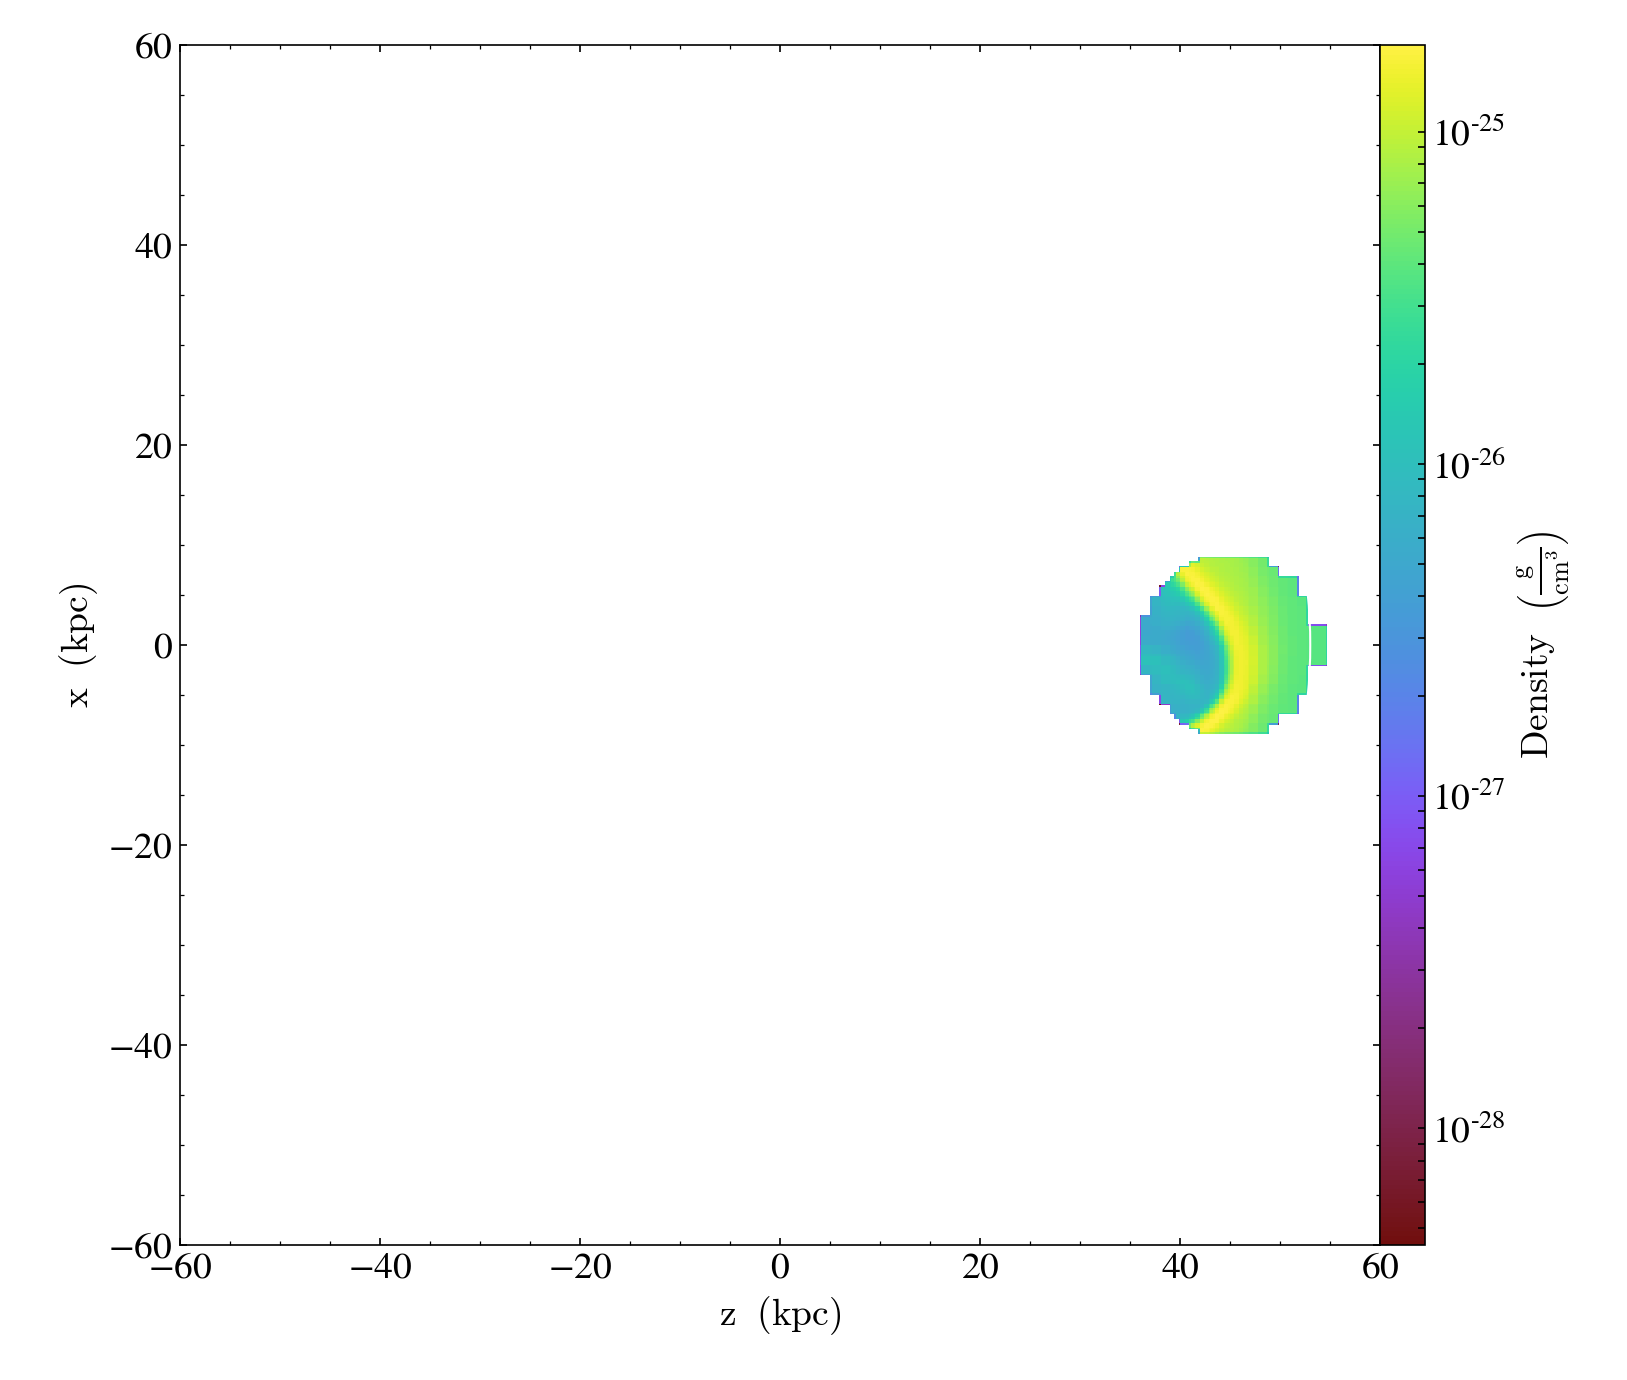

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:186: RuntimeWarning: divide by zero encountered in log10


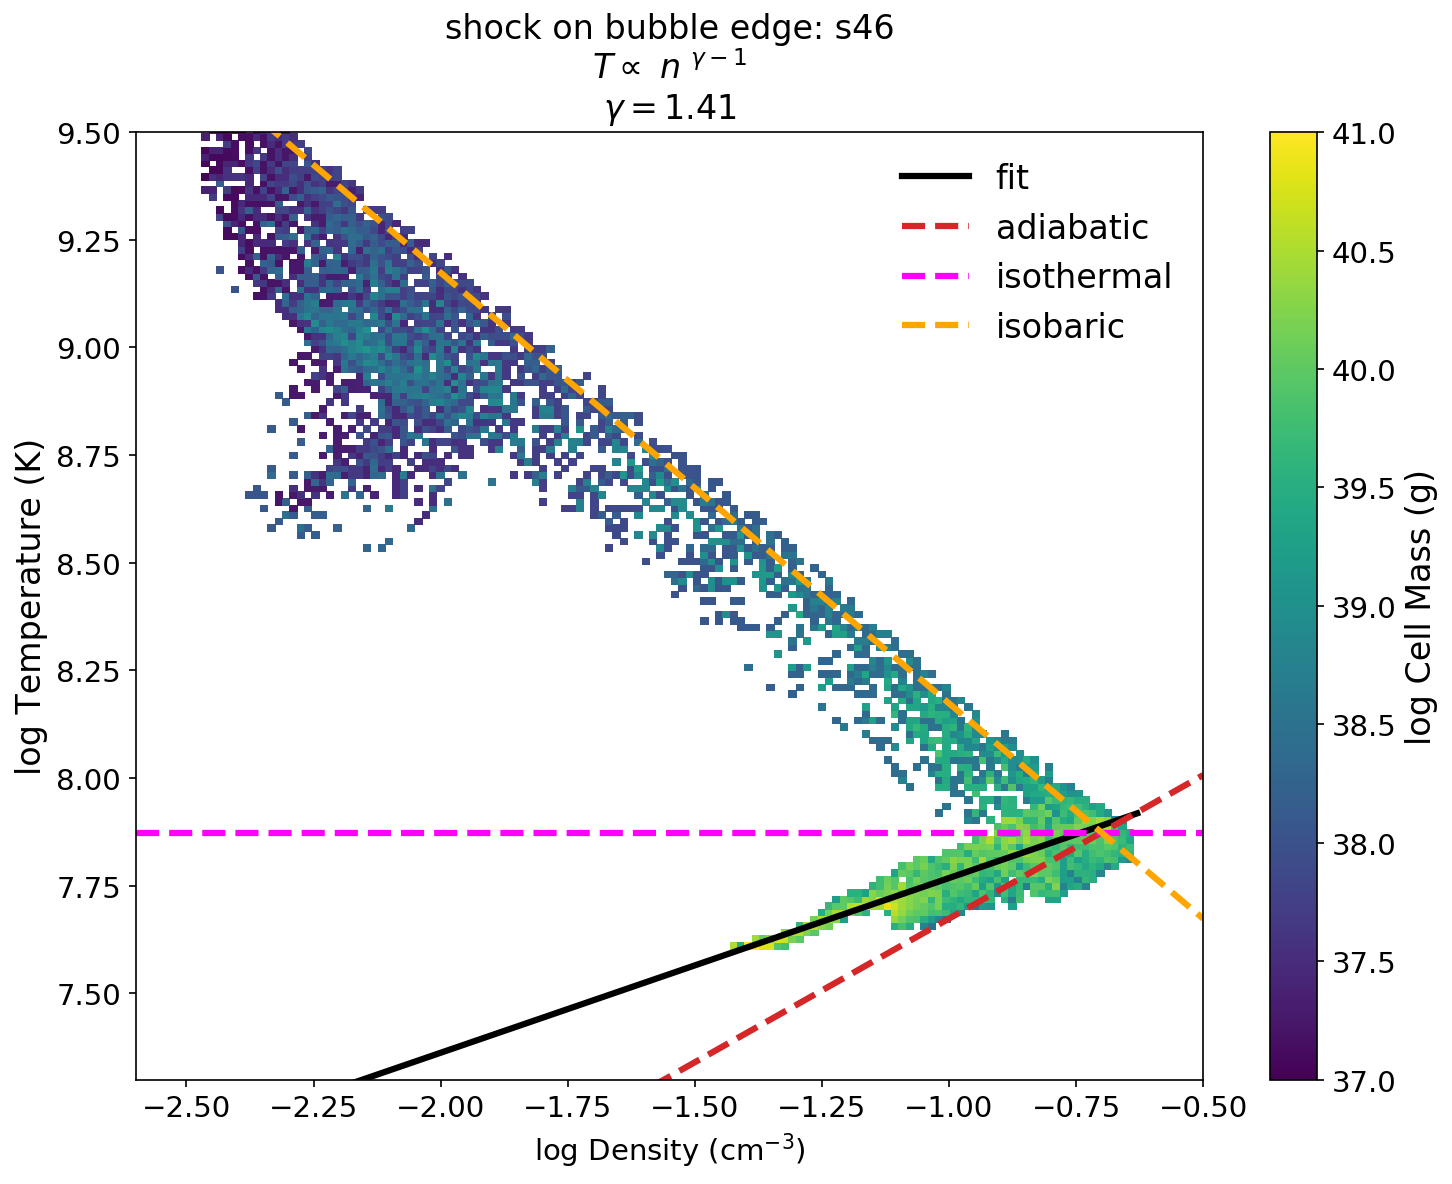

7.95205688477


In [4]:
import numpy as np
import json
import time
import matplotlib.pyplot as plt
import yt
yt.enable_parallelism()
from yt.utilities.cosmology import Cosmology  
from yt.units import kboltz
import sys
sys.path.append('/Users/coreybrummel-smith/GT/Kavli_Summer_Program/code/python_modules')
import Zeus
def scale_plot_size(factor=1.5):
    import matplotlib as mpl
    default_dpi = mpl.rcParamsDefault['figure.dpi']
    mpl.rcParams['figure.dpi'] = default_dpi*factor
scale_plot_size(1.5)


start = time.time()

def fit(a,b,x):
    return a + b*x

#plot_dir = "/mnt/home/cbrummelsmith/AGN_FB_plots/phase_plot_eos_time_series"
#fns = "/mnt/ceph/users/yli/FB_again/DD????/stest_????"
#ds0 = yt.load("/mnt/ceph/users/yli/FB_again/DD0000/stest_0000")

plot_dir = "/Users/coreybrummel-smith/GT/Kavli_Summer_Program/Paper/AGN_FB_paper/images"
fns = ["/Users/coreybrummel-smith/simulations/AGN_FB/DD0046/stest_0046"]
#ds0 = yt.load("/Users/coreybrummel-smith/simulations/AGN_FB/DD0046/stest_0046")

ts = yt.DatasetSeries(fns)
#t0 = ds0.current_time.to('Gyr')

my_storage = {}

#for sto, ds in yt.parallel_objects(ts, storage=my_storage):
for sto, ds in ts.piter(storage=my_storage):
    print(str(ds))
    Zeus.addShockMach(ds)

    sto.result_id = str(ds) 
    sto.result = {'gamma': {'full':                 {'cell_mass': {}, 'cell_volume': {}},
                            'central':              {'cell_mass': {}, 'cell_volume': {}},
                            'full_central_removed': {'cell_mass': {}, 'cell_volume': {}},
                            'shock':                {'cell_mass': {}, 'cell_volume': {}}}}

    #delta_t = ds.current_time.to('Gyr').v - t0.v
    #sto.result['delta_t'] = delta_t
    
    T_thresh = ds.quan(1e5, 'K')
    
    # make masks for different regions of interest
    #regions = ['shock', 'shock_in', 'shock_out']
    regions = ['shock']
    
    cx = ds.domain_center[0]
    cy = ds.domain_center[1]
    cz = ds.domain_center[2]

    czShock = cz - ds.quan(-45, 'kpc')
    czShock_in = cz - ds.quan(-38, 'kpc')
    czShock_out = cz - ds.quan(-47, 'kpc')    
    
    center_kpc  = {}
    center_kpc['full']    =  ds.arr([cx, cy, cz])
    #center_kpc['central'] =  ds.arr([cx - ds.quan(2,'kpc'), cy + ds.quan(2,'kpc'), cz])
    center_kpc['central'] =  ds.arr([cx, cy, cz])
    center_kpc['shock']   =  ds.arr([cx, cy, czShock])
    
    center_kpc['shock_in']   =   ds.arr([cx, cy, czShock_in])    
    center_kpc['shock_out']   =  ds.arr([cx, cy, czShock_out])    
    
    kpc_per_arcmin = ds.quan(21.21, 'kpc')
    r2p5  = 2.5  * kpc_per_arcmin
    r0p7  = 0.7  * kpc_per_arcmin
    r0p35 = 0.35 * kpc_per_arcmin

    radius_kpc = {} 
    radius_kpc['full']    = r2p5
    radius_kpc['central'] = r0p7
    radius_kpc['shock']   = ds.quan(9, 'kpc')
    
    radius_kpc['shock_out']   = r0p35/0.8
    radius_kpc['shock_in']   = r0p35    
    


    containers   = {}

    phasePlotLimits = {'full':                 
                        {'temperature': [  6.5,  10.2],  # log10(T)  [K]
                         'pressure':    [-12.0,  -7.0],  # log10(P)  [dyn/cm**2]
                         'n':           [ -4.0,   1.0],  # log10(n)  [1/cm**3]
                         'cell_mass':   [ 35.0,  41.5],  # log10(cell_mass) [g]
                         'cell_volume': [-14.6, -9.5]}, # log10(cell_volume) [1/cm**3]
                      
                      'central':              
                        {'temperature': [  6.5,  10.2],
                         'pressure':    [-12.0,  -7.0],
                         'n':           [ -4.0,   1.0],
                         'cell_mass':   [ 35.0,  41.5],
                         'cell_volume': [-14.6, -9.5]},
                      
                      'full_central_removed': 
                        {'temperature': [  6.5,  10.2],
                         'pressure':    [-11.0,  -8.0],
                         'n':           [ -4.0,   0.5],
                         'cell_mass':   [ 36.0,  43.2],
                         'cell_volume': [-14.6, -9.5]},

                      'shock':                 
                       {'temperature': [  7.3,  9.5],
                        'pressure':    [-9.8,  -8.6],
                        'n':           [ -2.6,   -0.5],
                        'cell_mass':   [ 37.0,  41],
                        'cell_volume': [-14.6, -9.5]},}
    
    for reg in regions:
        containers[reg] = ds.sphere(center_kpc[reg], radius_kpc[reg]).cut_region(["obj['temperature'] > %f"%T_thresh])
    

    if 'full' in regions and 'central' in regions:
        containers['full_central_removed'] = containers['full'] - containers['central']
        regions.append('full_central_removed')
    if 'shock_in' in regions and 'shock_out' in regions:
        containers['shock'] = containers['shock_out'] - containers['shock_in']
        

    width = ds.quan(120, 'kpc')
    cent = center_kpc['full']
    box = ds.box(cent - width/2, cent + width/2)
    for reg in regions:
        proj = yt.SlicePlot(ds, 'y', 'density', width=width, center=cent, data_source=containers[reg])
        proj.annotate_sphere(cent,  (r2p5.v, 'kpc'))
        proj.annotate_sphere(cent,  (r0p7.v, 'kpc'))
        #proj.annotate_sphere(c,  (r0p35.v, 'kpc'))
        #proj.save('%s/%s' % (plot_dir, reg))
        proj.show()
        #proj = yt.ProjectionPlot(ds, 'z', 'density', width=width, center=c, data_source=containers[reg])
        #proj.annotate_sphere(c,  (r2p5.v, 'kpc'))
        #proj.annotate_sphere(c,  (r0p7.v, 'kpc'))
        #proj.save('%s/%s' % (plot_dir, reg))    


    def linInterpPhasePlot(fieldx, fieldy, fieldw, containers, region):

        region_title = {'full_central_removed': '2.5\' excluding central 0.7\'',
                        'full': 'central 2.5\'', 'central': 'central 0.7\'',
                        'shock': 'shock on bubble edge'}[region]
        ylabel = {'pressure': r'log Pressure (dyne/cm$^2$)', 'temperature': r'log Temperature (K)'}[fieldy]
        zlabel = {'cell_mass':'log Cell Mass (g)', 
                  'xray_emissivity_0.5_7.5_keV':'log emissivity ($erg/(cm^3s)$)',
                  'cell_volume': 'log Cell Volume ($cm^{-3}$)'}[fieldw]
        expLabel = {'pressure': '\gamma', 'temperature': '\gamma - 1'}[fieldy]
        yLetter = {'pressure': 'P', 'temperature': 'T'}[fieldy]
        
        xx = np.log10(containers[region][fieldx].in_cgs())
        yy = np.log10(containers[region][fieldy].in_cgs())
        H2, xedges, yedges = np.histogram2d(xx, yy, bins=128, weights=containers[region][fieldw])
        H2 = H2.T
        
        xc = 0.5 * (xedges[:-1] + xedges[1:])
        yc = 0.5 * (yedges[:-1] + yedges[1:])
        X,Y = np.meshgrid(xc, yc)
        
        coeff, res, rank, sing, rcond = np.polyfit(X.ravel(), Y.ravel(), 1, w=H2.ravel(), full=True)
        #print coeff, res, rank, sing, rcond
        
        gamma = coeff[0]
        K = 10**coeff[1]
        #print("%s: gamma = %.3f, K = %.4g" % (fieldy, gamma, K))
        
        pLawIndex = {'pressure':gamma, 'temperature': gamma+1}[fieldy]
        sto.result['gamma'][region][fieldw][fieldy] = pLawIndex

        xmin, xmax = phasePlotLimits[region]['n'][0], phasePlotLimits[region]['n'][1]
        ymin, ymax = phasePlotLimits[region][fieldy][0], phasePlotLimits[region][fieldy][1]
        zmin, zmax = phasePlotLimits[region][fieldw][0], phasePlotLimits[region][fieldw][1]

        #xmin, xmax = xx.min(), xx.max()
        #ymin, ymax = yy.min(), yy.max()
        #zmin, zmax = 37, 43
        
        fig, ax = plt.subplots(1, 1, figsize=(10,8))
        pc = ax.pcolormesh(X, Y, np.log10(H2), vmin=zmin, vmax=zmax)

        adiab = {'pressure': 5./3, 'temperature': 2./3}[fieldy]
        isoth = {'pressure': 1,     'temperature':   0}[fieldy]
        isob  = {'pressure': 0,     'temperature':  -1}[fieldy]
        legend_loc = {'pressure':'lower right', 'temperature': 'upper right'}[fieldy]

        #yadiab = [coeff[1] + adiab * xmin,  coeff[1] + adiab * xmax]
        #yisoth = [coeff[1] + isoth * xmin,  coeff[1] + isoth * xmax]
        #yisob  = [coeff[1] +  isob * xmin,  coeff[1] +  isob * xmax]

        # shift lines over for shock
        # (for T vs n)
        xshift = -0.7
        yshift = -0.3
        # for (P vs n)
        #xshift = -0.78
        #yshift = -1.1
        yadiab = np.array([coeff[1] + adiab * (xmin-xshift),  coeff[1] + adiab * (xmax-xshift)])+yshift
        yisoth = np.array([coeff[1] + isoth * (xmin-xshift),  coeff[1] + isoth * (xmax-xshift)])+yshift
        yisob  = np.array([coeff[1] +  isob * (xmin-xshift),  coeff[1] +  isob * (xmax-xshift)])+yshift
    
        logrhofit = xedges
        logTfit = coeff[0]*xedges + coeff[1]
        ax.plot(logrhofit, logTfit, lw=3, c='#000000', label='fit')

        
        #ax.plot([xmin+0.8, xmax+0.8], yadiab, color='red',    linestyle='--', label='adiab.')
        #ax.plot([xmin+0.8, xmax+0.8], yisoth, color='#FF00FF',linestyle='--', label='isoth.')
        #ax.plot([xmin+0.8, xmax+0.8], yisob,  color='blue',   linestyle='--', label='isob.')        
        
        ax.plot(np.array([xmin, xmax]), np.array(yadiab), color='tab:red',    linestyle='--', label='adiabatic', lw=3)
        ax.plot(np.array([xmin, xmax]), np.array(yisoth), color='#FF00FF',linestyle='--', label='isothermal', lw=3)
        ax.plot(np.array([xmin, xmax]), np.array(yisob),  color='orange',   linestyle='--', label='isobaric', lw=3)
        #ax.plot(np.array([xmin, xmax]), np.array(yisob),  color='gold',   linestyle='--', label='isob.')

        fontsize = 16
        ticksize = 14
        cbar = fig.colorbar(pc)
        cbar.set_label(label=zlabel, size=fontsize)
        cbar.ax.tick_params(labelsize=ticksize)
        ax.tick_params(labelsize=ticksize)
        ax.set_xlim(xmin, xmax)
        ax.set_ylim(ymin, ymax)
        ax.set_xlabel(r'log Density (cm$^{-3}$)', fontsize=14)
        ax.set_ylabel(ylabel, fontsize=fontsize)
        ax.set_title(region_title + ": s46" + "\n"+r"$%s\propto\ n^{\ %s}$"%(yLetter, expLabel) + "\n" +
                     r"$\gamma = %.2f$" %(pLawIndex), fontsize=fontsize)
        plt.legend(loc=legend_loc, fontsize=fontsize, frameon=False)
        plt.tight_layout()
        #plt.savefig("%s/phasePlotFit_%s_n%s_%s"%(plot_dir, region, yLetter, str(ds)))
        plt.show()
        #plt.clf()

    
    #yt.add_xray_emissivity_field(ds, e_min=0.5, e_max=7.5, redshift=0.01790, metallicity=0.3)
    
    for weight in ['cell_mass']:#, 'cell_volume']:#, 'xray_emissivity_0.5_7.5_keV']:
        #print("\nWeight: %s\n"%weight)
        for reg in regions:
            #for field in ['temperature', 'pressure']:
            for field in ['temperature']:
                linInterpPhasePlot('number_density', field, weight, containers, reg)
    
    

#if yt.is_root():
#    with open('%s/gamma_time_series.json'%plot_dir, 'w') as fp:
#        json.dump(my_storage, fp)    

"""
with open('data.json', 'r') as fp:
    data = json.load(fp)    
"""
print(time.time() - start)

## Shock Mach number in shocked region

In [ ]:
container = containers['shock']
mach = c['ShockMach']
cm = c['cell_mass']
shocked = mach!=0
mach = mach[shocked]
cm = cm[shocked]
mach_avg = (mach*cm).sum() / cm.sum()
print mach_avg

# Shocked region: MH power spectra, C and R

[slice(133, 170, None), slice(133, 170, None), slice(225, 262, None)]
fa, fb number_density number_density
fa=fb EQUAL
Using Mexican Hat Filter with 25 wavenumbers in range k = [1/25, 0.5] cells^-1
25/25
Finished power spectrum.
fa, fb pressure pressure
fa=fb EQUAL
Using Mexican Hat Filter with 25 wavenumbers in range k = [1/25, 0.5] cells^-1
25/25
Finished power spectrum.
fa, fb number_density pressure
fa != fb cross spectra
Using Mexican Hat Filter with 25 wavenumbers in range k = [1/25, 0.5] cells^-1
25/25
cross
Using Mexican Hat Filter with 25 wavenumbers in range k = [1/25, 0.5] cells^-1
25/25
Finished power spectrum.
s46 nP
('n', 'P')


/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:115: RuntimeWarning: invalid value encountered in sqrt
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:115: RuntimeWarning: invalid value encountered in less_equal
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:117: RuntimeWarning: invalid value encountered in divide


pair nP


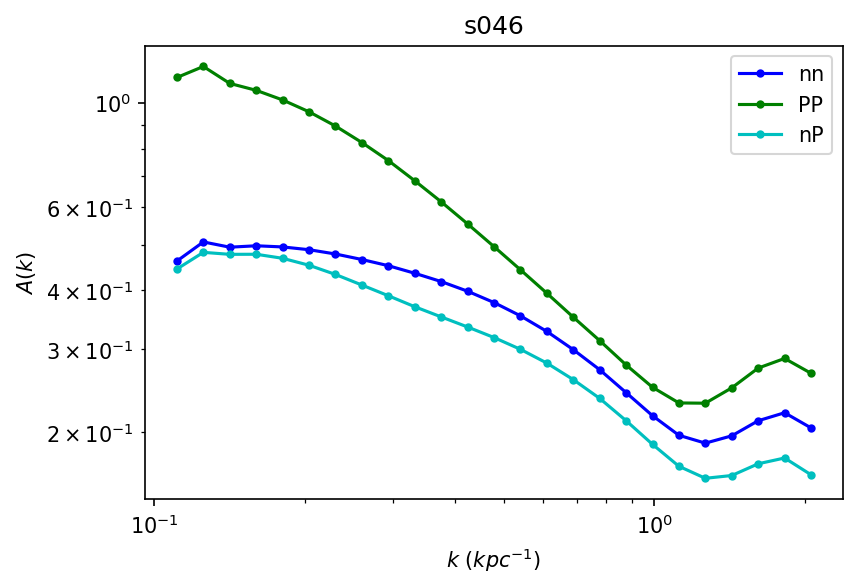

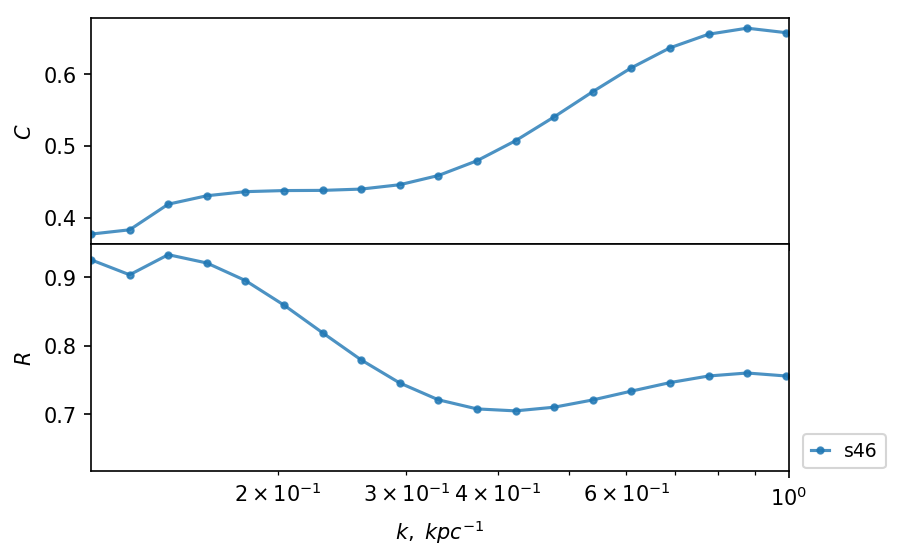

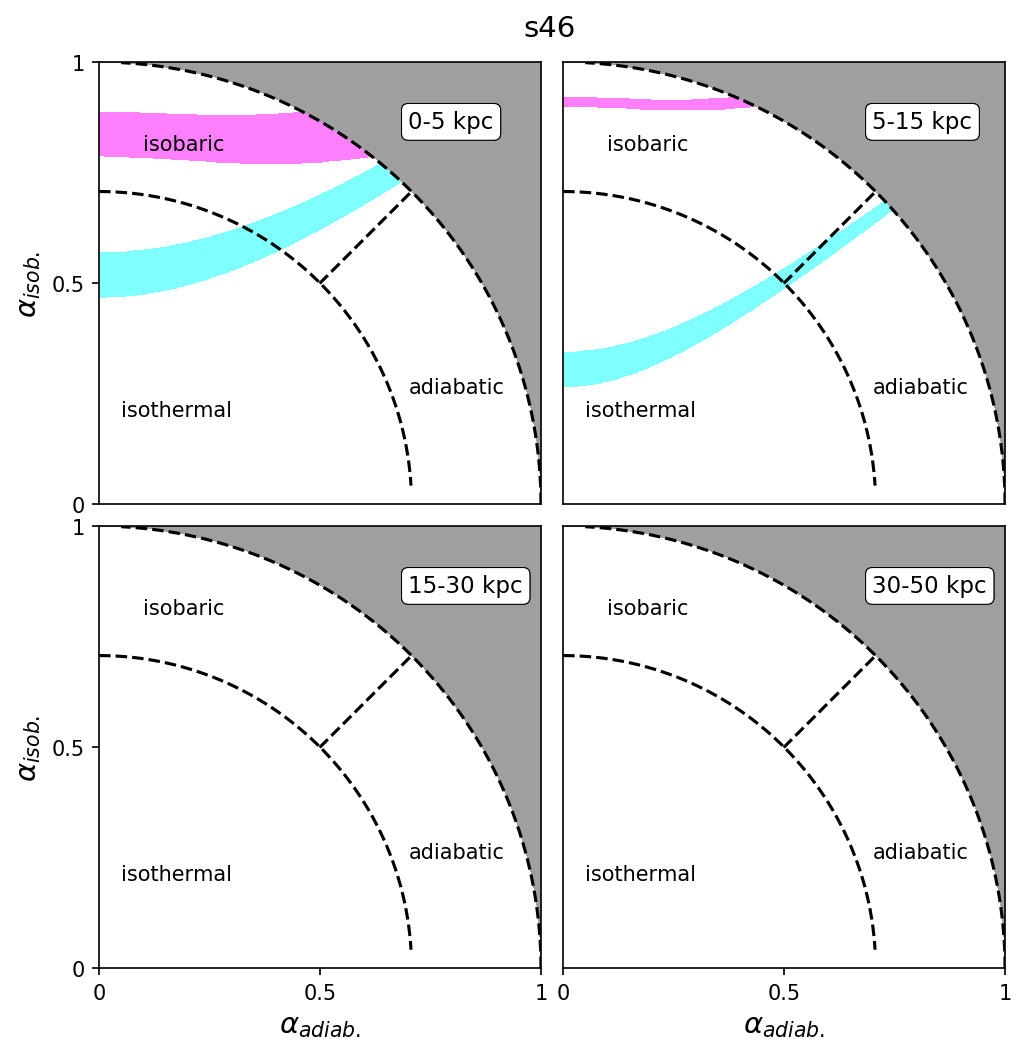

In [5]:
import sys
sys.path.append('/Users/coreybrummel-smith/GT/Kavli_Summer_Program/code/python_modules')
import h5py
import numpy as np
import json
from astropy.io import fits
import MexicanHat as mh
import fft_power_spectrum as my_fft_ps
import math
import matplotlib
import matplotlib.pyplot as plt
import Dictionary_to_HDF5 as D2H5
import RadialProfile


def scale_plot_size(factor=1.5):
    import matplotlib as mpl
    default_dpi = mpl.rcParamsDefault['figure.dpi']
    mpl.rcParams['figure.dpi'] = default_dpi*factor
scale_plot_size(1.5)

def nearest_index(data, target):
    return np.argmin(np.abs(data-target))

def compute_power_spectra(h5File, MexicanHat, mask, snapshots, akpc, width_arcmin, field_pairs, field2letter, ndims):
    spectra_data = {}

    width = width_arcmin * akpc

    for snap in snapshots:
        if mask is not None:
            mask = h5File['s%03d' % snap]['masks'][mask].value
        spectra_data[snap] = {}
        for fa, fb in field_pairs:
            print 'fa, fb', fa, fb
            pair = '%s%s' %(field2letter[fa], field2letter[fb])      
            spectra_data[snap][pair] = {}
            residual_a = h5File['s%03d' % snap]['residual_%s' % fa].value
            if fa == fb:
                print 'fa=fb EQUAL'
                p_MH, k_MH = MexicanHat.power_spectrum(residual_a, mask=mask, phys_width=width)
            else:   
                print 'fa != fb cross spectra'
                residual_b = h5File['s%03d' % snap]['residual_%s' % fb].value
                p_MH, k_MH = MexicanHat.power_spectrum(residual_a, residual_b, mask=mask, phys_width=width)  
            
            a_MH = MexicanHat.power_spectrum_amplitude(p_MH, k_MH, n=ndims)
 
            spectra_data[snap][pair]['power_spec'] = p_MH    
            spectra_data[snap][pair]['amplitude']  = a_MH
    spectra_data['k'] = k_MH

    return spectra_data


def compute_C_and_R(MexicanHat, snapshots, spectra_data, cross_pairs):
    for snap in snapshots:
        for pair in cross_pairs:
            print 's%d %s'%(snap, pair)
            a,b = pair[0],pair[1]
            print (a,b)
            power_a  = spectra_data[snap]['%s%s'%(a,a)]['power_spec']
            power_b  = spectra_data[snap]['%s%s'%(b,b)]['power_spec']
            power_ab = spectra_data[snap]['%s%s'%(a,b)]['power_spec']

            coh = MexicanHat.coherence(power_a, power_b, power_ab)
            rat = MexicanHat.ratio(power_a, power_ab)

            spectra_data[snap][pair]['C'] = coh
            spectra_data[snap][pair]['R'] = rat

    return spectra_data

def C_and_R_stats(spectra_data, snapshots, ranges, cross_pairs):
    # Get statistics for C and R in different length scale bins
    stats = {}
    k    = spectra_data['k']
    for snap in snapshots:
        stats[snap] = {'C': {}, 'R': {}}
        for pair in cross_pairs:
            coh  = spectra_data[snap][pair]['C']
            rat  = spectra_data[snap][pair]['R']
    
            # find C and R stats at different length scales
            l = 1./k
            lscale_ind = {'%s-%s'%(a,b): range(nearest_index(l,b),nearest_index(l,a)+1)  for a, b in ranges}      
            
            stats[snap]['C'][pair] = {}
            stats[snap]['R'][pair] = {}
            
            for a, b in ranges:
                scale = '%s-%s'%(a,b)
                ind = lscale_ind[scale]
                stats[snap]['C'][pair][scale] = (coh[ind].min(),coh[ind].max(),coh[ind].mean(),coh[ind].std())
                stats[snap]['R'][pair][scale] = (rat[ind].min(),rat[ind].max(),rat[ind].mean(),rat[ind].std())
    return stats
            
#----------------------------------------------------------------------

def coherence_and_ratio_nP(aQ, aP):
    gQ, gP, gT = 5./3., 0, 1 # adiabatic indicies
    aQsq = aQ * aQ
    aPsq = aP * aP
    aTsq = 1 - aQsq - aPsq
    
    alphaSq = [aQsq, aPsq, aTsq]
    gamma   = [gQ, gP, gT]
    
    top = np.zeros_like(aQ)
    bot = np.zeros_like(aQ)
    for i in range(len(alphaSq)):
        top += alphaSq[i] * (gamma[i])
        bot += alphaSq[i] * (gamma[i])**2
    
    mask = np.logical_not(np.sqrt(aTsq) <= 1)
    R = top
    C = top/np.sqrt(bot)
    
    R[mask] = np.nan
    C[mask] = np.nan    
    
    return C, R

def make_analytic_C_R_maps(res):

    map_data = {'C': {}, 'R': {}}

    # Parameter space: alpha_adiabatic (aQ) and alpha_isobaric (aP)
    res = 800
    x = y = np.linspace(0, 1, 800)
    aQ, aP = np.meshgrid(x, y)

    Cmap_nP, Rmap_nP = coherence_and_ratio_nP(aQ, aP)

    # isothermal quarter circle line
    xnew = x[x < 1/np.sqrt(2)]
    ynew = np.sqrt(1./2. - xnew**2)
    yT = ynew*res
    xT = xnew*res
    
    # outer quarter circle line
    xEdge = x[x < 1]
    yEdge = np.sqrt(1 - xEdge**2)
    yMax = xEdge*res
    xMax = yEdge*res
    
    # dividing line between isobaric and adiabatic
    xQP = np.linspace(xT.max()/np.sqrt(2), res/np.sqrt(2), 2)

    map_data['C']['map'] = Cmap_nP
    map_data['R']['map'] = Rmap_nP
    map_data['isothermal_line'] = (xT,  yT)
    map_data['isob_adiab_line'] = (xQP, xQP)
    map_data['max_line']        = (xMax, yMax)   
    map_data['res'] = res
    
    #----------------------------------------------------------------
    
    # Set up custom uniform colormaps
    colors_w = [(1,1,1),(1,1,1)]  #RGBA
    colors_t = [(0,1,1),(0,1,1)] # teal 
    colors_m = [(1,0,1),(1,0,1)] # magenta
    
    n_bin = 1 
    cm_w = matplotlib.colors.LinearSegmentedColormap.from_list(
        'white', colors_w, N=n_bin)
    cm_t = matplotlib.colors.LinearSegmentedColormap.from_list(
        'teal', colors_t, N=n_bin)
    cm_m = matplotlib.colors.LinearSegmentedColormap.from_list(
        'magenta', colors_m, N=n_bin)

    map_data['C']['cmap'] = cm_m
    map_data['R']['cmap'] = cm_t   

    return map_data

def add_CR_bands_to_CR_map(map_data, snapshots, stats, scales, cross_pairs):
    '''
     Create masks for plotting bands of Cp and Rp ontop analytic Ca and Ra maps
     These bands are also used for determining the mean and error on alpha parameters
     characterizing the nature of perturbations.
     Cp, Rp: Coherence and ratio determined from power spectra
     Ca, Ra, analytical Coherence and ratio as function of alpha parameters
    
     We determine the max delta_Ca and delta_Ra between neighboring cells in analytic map.
     Due to the non uniform distribution of Ca and Ra in the analytic maps, the same delta
     is not good for all values of Cp and Rp. This means we have to calculate deltas for
     each length scale. This delta is used to plot very thin bands representing mean values.
    '''
    for letter in ['C', 'R']:
        vmap = map_data[letter]['map']
        vmap[np.isnan(vmap)] = np.inf
        res = vmap.shape[0]
        for snap in snapshots:
            map_data[letter][snap] = {}  
            for pair in cross_pairs:
                map_data[letter][snap][pair] = {}               
                for scale in scales:
                    map_data[letter][snap][pair][scale] = {}               
                    avg = stats[snap][letter][pair][scale][2]  # mean value at given length scale
                    std = stats[snap][letter][pair][scale][3]

                    # find delta_Ca and delta_Ra
                    near = nearest_index(vmap, avg)
                    j0,i0 = np.unravel_index(near, vmap.shape)
                    v = vmap[j0,i0]
                    delta = -1
                    for j in [-1,0,1]:
                        for i in [-1,0,1]:
                            if (j0+j < 0) or (i0+i < 0) or (j0+j >= res) or (i0+i >= res): continue
                            dv = np.abs(v - vmap[j0+j, i0+i])
                            if dv > delta: delta = dv
                    map_data[letter][snap][pair][scale]['max_delta'] = 3*delta  # make band thicker than 1 cell

                    # masks for bands showing mean +/- 1 stdev, and mean +/- delta_analytic 
                    # for both Cp and Rp.
                    for band in ['err_mask', 'mean_mask']:
                        if band == 'err_mask':
                            vmin = avg-std
                            vmax = avg+std
                        elif band == 'mean_mask':    
                            vmin = avg-delta
                            vmax = avg+delta                 
                        mask = np.logical_and(vmap > vmin, vmap < vmax)
                        map_data[letter][snap][pair][scale][band] = mask 

                    # end for band
                # end for scale
            # end for pair in cross_pairs
        # end for snap
    # end for letter
    return map_data    

def yt_region_to_covering_grid_slice(region, cov_grid):
    # assume region and covering grid are centered at the same point
    dims = cov_grid.ActiveDimensions
    kpc_per_pix = max((cov_grid.right_edge - cov_grid.left_edge).to('kpc')) / dims
    center_offset = (region.center - region.ds.domain_center).to('kpc')
    radius_pix = (region.base_object.radius.to('kpc') / kpc_per_pix).v
    
    grid_center = cov_grid.ActiveDimensions//2 - 1
    region_pix_center = grid_center + center_offset / kpc_per_pix
    region_pix_center = region_pix_center.v
    slices = []
    
    for c, r in zip(region_pix_center.astype(int), radius_pix.astype(int)):
        slices.append( slice(c-r, c+r+1) )

    return slices

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
projection = False

plotdir = '/Users/coreybrummel-smith/GT/Kavli_Summer_Program/AGN_FB_plots/corey_MH_results/'
datadir = '/Users/coreybrummel-smith/GT/Kavli_Summer_Program/results_data'
snapshots = [46]

cr_map_resolution = 800
map_letters = ['R','C']
field_pairs = [('number_density', 'number_density'), 
               ('pressure', 'pressure'), 
               ('number_density', 'pressure')]
field_pairs_short = ['nn', 'PP', 'nP']
cross_pairs = ['nP']

field2letter = {'number_density':'n', 'pressure':'P', 'temperature':'T', 'mock_hard':'H', 'mock_soft':'S'}
colors = {'nn':'b', 'TT':'r', 'PP':'g', 'nT':'m', 'nP':'c', 'HH':'tab:red', 'SS':'tab:blue', 'HS':'k'}

#field_pairs = [('number_density', 'number_density'), 
#               ('temperature', 'temperature'), 
#               ('number_density', 'temperature')]
#field_pairs_short = ['nn', 'TT', 'nT']
#cross_pairs = ['nT']

ranges = [(0,5), (5,15), (15,30), (30,50)] # length scales in kpc
scales = ['%s-%s'%(a,b) for a,b in ranges]


if not projection:
    gridLevel=9
    ndims = 3
    dim_str = '3d_gridLevel_%02d' % gridLevel
else:
    ndims = 2
    dim_str = '2d' 
    field_pairs += [('mock_hard', 'mock_hard'),
                    ('mock_soft', 'mock_soft'),
                    ('mock_hard', 'mock_soft')]
    field_pairs_short += ['HH', 'SS', 'HS']
    cross_pairs += ['HS']

h5file = h5py.File('%s/residuals_%s.h5' % (datadir, dim_str), 'r')
kpc_per_arcmin = h5file.attrs['kpc_per_arcmin'] 
width_arcmin   = h5file.attrs['width_arcmin']
if not projection:
    gridLevel = h5file.attrs['gridLevel'] 
    
    
center = ds.arr([0.5,0.5,0.5], 'code_length')
radius = ds.quan(width_arcmin/2. * kpc_per_arcmin, 'kpc')
le = center - radius
re = center + radius
# 
# make uniform grid from AMR data with left edge at le = (x, y, z)
# nside is the resolution of the cube (nx, ny, nz)
#
nside = np.round((re-le) * ds.domain_dimensions * 2**gridLevel).astype(int)
for i in range(len(nside)):
    if nside[i]%2 == 0:
        nside[i] += 1
        
covGrid = ds.covering_grid(level=gridLevel, left_edge=le, dims=nside)
covGrid.set_field_parameter('center', center)
    
kpts=25
conv_method = 'nearest'
#mask_name = None
#mask_name = 'no_large_density_fluctuation'
mask_name = 'no_cold_gas'
MH = mh.MexicanHat(Nk=kpts, mode=conv_method)

slices = yt_region_to_covering_grid_slice(containers['shock'], covGrid)
print slices

spectra_data = {}
akpc = kpc_per_arcmin
h5File = h5file
width = radius_kpc['shock'].to('kpc').v

for snap in snapshots:
    if mask_name is not None:
        mask = h5File['s%03d' % snap]['masks'][mask_name].value
        mask = mask[slices[0], slices[1], slices[2]]
        
    spectra_data[snap] = {}
    for fa, fb in field_pairs:
        print 'fa, fb', fa, fb
        pair = '%s%s' %(field2letter[fa], field2letter[fb])      
        spectra_data[snap][pair] = {}
        residual_a = h5File['s%03d' % snap]['residual_%s' % fa].value
        residual_a = residual_a[slices[0], slices[1], slices[2]]

        if fa == fb:
            print 'fa=fb EQUAL'
            p_MH, k_MH = MH.power_spectrum(residual_a, mask=mask, phys_width=width)
        else:   
            print 'fa != fb cross spectra'
            residual_b = h5File['s%03d' % snap]['residual_%s' % fb].value
            residual_b = residual_b[slices[0], slices[1], slices[2]]
            p_MH, k_MH = MH.power_spectrum(residual_a, residual_b, mask=mask, phys_width=width)  
        
        a_MH = MH.power_spectrum_amplitude(p_MH, k_MH, n=ndims)

        spectra_data[snap][pair]['power_spec'] = p_MH    
        spectra_data[snap][pair]['amplitude']  = a_MH

spectra_data['k'] = k_MH


h5file.close()
spectra_data = compute_C_and_R(MH, snapshots, spectra_data, cross_pairs)
stats = C_and_R_stats(spectra_data, snapshots, ranges, cross_pairs)
cr_map_data = make_analytic_C_R_maps(cr_map_resolution)
cr_map_data = add_CR_bands_to_CR_map(cr_map_data, snapshots, stats, scales, cross_pairs)



# ------- PLOTTING --------  

res = cr_map_resolution

# pixel boundaries of our map
xmin, xmax, ymin, ymax = (0, res, 0, res)
# We'll also create a grey background into which the pixels will fade
white = np.array([255,255,255]*res**2).reshape(res,res,3)


for snap in snapshots:


    # Power spectra amplitude figure
    fig1, axis = plt.subplots(1,1)

    # C(k) and R(k) figure
    fig2, (ax1,ax2) = plt.subplots(2,1, sharex=True)
    fig2.subplots_adjust(hspace=0)  

    for pair in field_pairs_short:
        k = spectra_data['k']
        a3d = spectra_data[snap][pair]['amplitude']
        axis.plot(k, a3d, marker='o', markersize=3, color=colors[pair], label=pair)#, linestyle='none')

    axis.set_xscale('log')
    axis.set_yscale('log')    
    #axis.set_ylim(1e-2,1)
    #axis.set_xlim(k.min(),1)    
    axis.set_title('s%03d'% (snap))
    axis.set_xlabel(r"$k\ (kpc^{-1})$")
    axis.set_ylabel(r"$A(k)$")
    axis.legend()


    for pair in cross_pairs:
        print "pair", pair
        # C and R map overlap figure
        fig, axes = plt.subplots(2,2, figsize=(8,8))
        fig.subplots_adjust(hspace=0.05, wspace=0.05, right=0.88)    
        fig.suptitle('s%s'%snap, x=0.5, y=0.92, fontsize=14)
        axes = axes.flatten()

        k = spectra_data['k']
        coh = spectra_data[snap][pair]['C']
        rat = spectra_data[snap][pair]['R']
        ax1.plot(k, coh, alpha=0.8, marker='.', label='s%s'%snap) 
        ax2.plot(k, rat, alpha=0.8, marker='.', label='s%s'%snap)

        # loop over 4 C and R overlap axes
        for ax in axes:
            ax.imshow(white, origin='lower')
            ax.plot(cr_map_data['isothermal_line'][0], cr_map_data['isothermal_line'][1], 'k--')
            ax.plot(cr_map_data['isob_adiab_line'][0], cr_map_data['isob_adiab_line'][1], 'k--')
            ax.plot(cr_map_data['max_line'][0], cr_map_data['max_line'][1], 'k--')
            ax.set_xlabel(r'$\alpha_{adiab.}$', fontsize=14)
            ax.set_ylabel(r'$\alpha_{isob.}$', fontsize=14)  
            ax.set(xticks=[0, res/2, res], yticks=[0, res/2, res],
                   xticklabels=[0, 0.5, 1], yticklabels=[0, 0.5, 1])
            ax.text(0.7*res,  0.25*res, 'adiabatic',  fontsize=10)
            ax.text(0.1*res,  0.8*res,  'isobaric',   fontsize=10)
            ax.text(0.05*res, 0.20*res, 'isothermal', fontsize=10)
            
        for letter in map_letters:
            data = cr_map_data[letter]['map']
            cmap = cr_map_data[letter]['cmap']
            for i, (scale, (a,b)) in enumerate(zip(scales,ranges)):
                stat = stats[snap][letter][pair][scale]

                avg = stat[2]
                std = stat[3]
                vmin = avg-std
                vmax = avg+std                 
                
                # Create an alpha channel based measured C or R values
                mask = cr_map_data[letter][snap][pair][scale]['err_mask']
                alphas = np.clip(mask, 0, .5)  # alpha set to 
                
                # Make uniform MxM pixel value array
                highlight = np.ones_like(data)
                # turn our pixel values into MxNx4 color array
                highlight = cmap(highlight)
                # Now set the alpha channel to the one we created above
                highlight[..., -1] = alphas

                axes[i].imshow(highlight, extent=(xmin, xmax, ymin, ymax), origin='lower')
                axes[i].tick_params(labelsize=10)
                axes[i].text(0.7, 0.85, '%s-%s kpc'%(a,b), color='k', 
                             transform=axes[i].transAxes, fontsize=11,
                             bbox=dict(facecolor='white', boxstyle='round', lw=0.5))
                
                # mask outside of circle in grey
                greyVal = 0.5
                n_bin = 1 
                colors_gr = [(greyVal,greyVal,greyVal),(greyVal,greyVal,greyVal)] # grey 
                cm_gr = matplotlib.colors.LinearSegmentedColormap.from_list(
                    'grey', colors_gr, N=n_bin)                
                x = y = np.linspace(0, 1, 800)
                aQ, aP = np.meshgrid(x, y)
                r = np.sqrt(aQ**2 + aP**2)
                mask = r > 1
                alphas = np.clip(mask, 0, .5)
                highlight = np.ones_like(r)
                highlight = cm_gr(highlight)
                # Now set the alpha channel to the one we created above
                highlight[..., -1] = alphas
                axes[i].imshow(highlight, extent=(xmin, xmax, ymin, ymax), origin='lower')  

        ## END for letter in map_letters                          
            
        axes[0].get_xaxis().set_visible(False)
        axes[1].get_xaxis().set_visible(False)
        axes[1].get_yaxis().set_visible(False) 
        axes[3].get_yaxis().set_visible(False)  
        
    ## END for pair in cross_pairs

    # C(k) and R(k) axes specs
    ax2.set_xscale('log')
    ax2.set_xlim(k.min(),1)    
    ax2.set_xlabel(r"$k,\ kpc^{-1}$")
    ax1.set_ylabel(r"$C$")
    ax2.set_ylabel(r"$R$")
    ax2.legend(loc=8, ncol=1, bbox_to_anchor=(1.08,-0.03), fontsize=9, handlelength=1)

    mask_str = '_'+mask_name if mask_name is not None else ''
    fig1.savefig("%s/MH_%03d_shock_nP_power_spectra_%s%s"% (plotdir, snap, dim_str, mask_str))
    fig2.savefig("%s/MH_%03d_shock_nP_CR_%s%s"           % (plotdir, snap, dim_str, mask_str))
    fig.savefig( "%s/MH_%03d_shock_nP_CR_map_%s%s"       % (plotdir, snap, dim_str, mask_str))

    plt.show()  

### END for snap in snapshots

#spectra_fn = '%s/spectra_%s%s.h5' % (datadir, dim_str, mask_str)
#D2H5.save_dict_to_hdf5(spectra_data, spectra_fn)
#f = open(spectrafn, 'w')
#json.dump(spectra_data, f)
#f.close()

In [ ]:
radius_pix = {}
center_pix = {}
sphere_mask = {}



pix_to_kpc = 
#center of region in pixel space
center_pix[region] = length_to_pix(center_kpc[region], width_kpc, width_pix)

# radius in pixels of spherical region (also width of box around region)
radius_pix[region] = length_to_pix(radius_kpc[region], width_kpc, width_pix)
# left and right edges of cubes around regions of interest in pixel space
LE_pix[region] = center_pix[region] - radius_pix[region]
RE_pix[region] = center_pix[region] + radius_pix[region] + 1
LE = LE_pix[region]
RE = RE_pix[region]

# cut out regions of interest from fluctuation arrays
fluc_n[region]    = dens_fluc[ LE[0]:RE[0], LE[1]:RE[1], LE[2]:RE[2] ]

# radius (pixel distance) maps for each region
x = np.arange(-radius_pix[region], radius_pix[region] + 1)
y = np.arange(-radius_pix[region], radius_pix[region] + 1)
z = np.arange(-radius_pix[region], radius_pix[region] + 1)
xxx, yyy, zzz = np.meshgrid(x,y,z)  
radii_map[region] = np.sqrt(xxx**2 + yyy**2 + zzz**2)

# spherical mask for each region
sphere_mask[region] = radii_map[region] < radius_pix[region]
sphere_mask[region] = np.logical_and(sphere_mask[region], hotMasks[region])

In [ ]:
h5file

In [ ]:
def yt_region_to_covering_grid_slice(region, cov_grid):
    # assume region and covering grid are centered at the same point
    dims = cov_grid.ActiveDimensions
    kpc_per_pix = max((cov_grid.right_edge - cov_grid.left_edge).to('kpc')) / dims
    center_offset = (region.center - region.ds.domain_center).to('kpc')
    radius_pix = (container.base_object.radius.to('kpc') / kpc_per_pix).v
    
    grid_center = cov_grid.ActiveDimensions//2 - 1
    region_pix_center = grid_center + center_offset / kpc_per_pix
    region_pix_center = region_pix_center.v
    slices = []
    
    for c, r in zip(region_pix_center.astype(int), radius_pix.astype(int)):
        slices.append( slice(c-r, c+r+1) )

    return slices

yt_region_to_covering_grid_slice(container, covGrid)

In [ ]:
slice?

In [ ]:
0.48828085 * covGrid.ActiveDimensions

In [ ]:
gridLevel = 9
center = ds.arr([0.5,0.5,0.5], 'code_length')
radius = ds.quan(width_arcmin/2. * kpc_per_arcmin, 'kpc')
le = center - radius
re = center + radius
# 
# make uniform grid from AMR data with left edge at le = (x, y, z)
# nside is the resolution of the cube (nx, ny, nz)
#
nside = np.round((re-le) * ds.domain_dimensions * 2**gridLevel).astype(int)
for i in range(len(nside)):
    if nside[i]%2 == 0:
        nside[i] += 1
covGrid = ds.covering_grid(level=gridLevel, left_edge=le, dims=nside)
covGrid.set_field_parameter('center', center)        

In [ ]:
container

In [ ]:
ds

In [ ]:
print slices

In [ ]:
plt.imshow(residual_a[residual_a.shape[0]//2,:,:], origin='lower')
cbar = plt.colorbar()
cbar.set_clim(0,4)
plt.title('s046 density 3d residual slice')
#plt.savefig('s046_density_3d_residual_slice')
plt.show()
plt.imshow(residual_a[residual_a.shape[0]//2,:,:][slices[1],slices[2]], origin='lower')
plt.colorbar()
plt.title('s046 density 3d residual slice: shock')
#plt.savefig('s046_density_3d _residual_slice_shock')
plt.show()

plt.imshow(residual_a.mean(axis=0), origin='lower')
plt.colorbar()
plt.title('s046 density 3d residual LOS average')
#plt.savefig('s046_density_3d_residual_LOS_average')
plt.show()
plt.imshow(residual_a.mean(axis=0)[slices[1],slices[2]], origin='lower')
plt.colorbar()
plt.title('s046 density 3d residual LOS average: shock')
#plt.savefig('s046_density_3d _residual_LOS_average_shock')
plt.show()

In [ ]:
fa

In [ ]:
plt.errorbar?

In [2]:
c = containers['shock']
print c.quantities.weighted_average_quantity('number_density','cell_mass')
print c.quantities.weighted_average_quantity('temperature','cell_mass')
print c.quantities.weighted_average_quantity('pressure','cell_mass')

0.10185142572357189 cm**(-3)
101984201.67789148 K
1.0087014670201395e-09 dyne/cm**2


In [3]:
plt.contour?

In [7]:
import scipy

In [8]:
scipy.ndimage.gaussian_filter?

In [ ]:
q